In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
def imshow(img):
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(15,15))
    return plt.imshow(rgb_img)

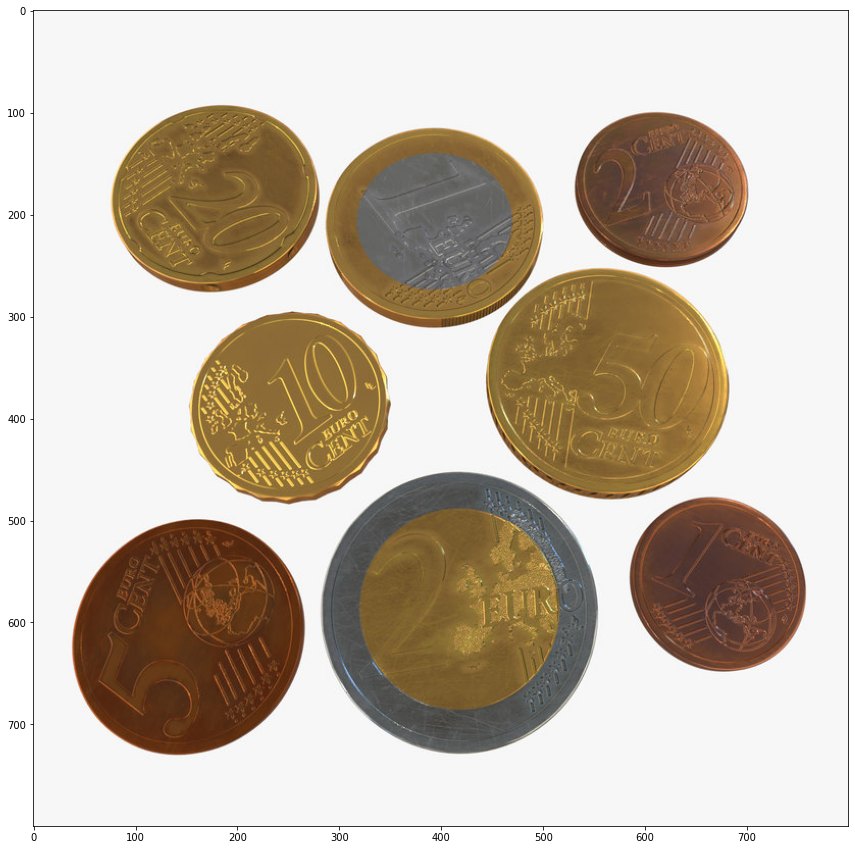

In [5]:
coins = cv2.imread('../img/coins5.jpg')
grayscale_coins = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
imshow(coins)

In [6]:
# Computing the threshold value
retval, threshold = cv2.threshold(grayscale_coins, 200, 255, cv2.THRESH_BINARY_INV)

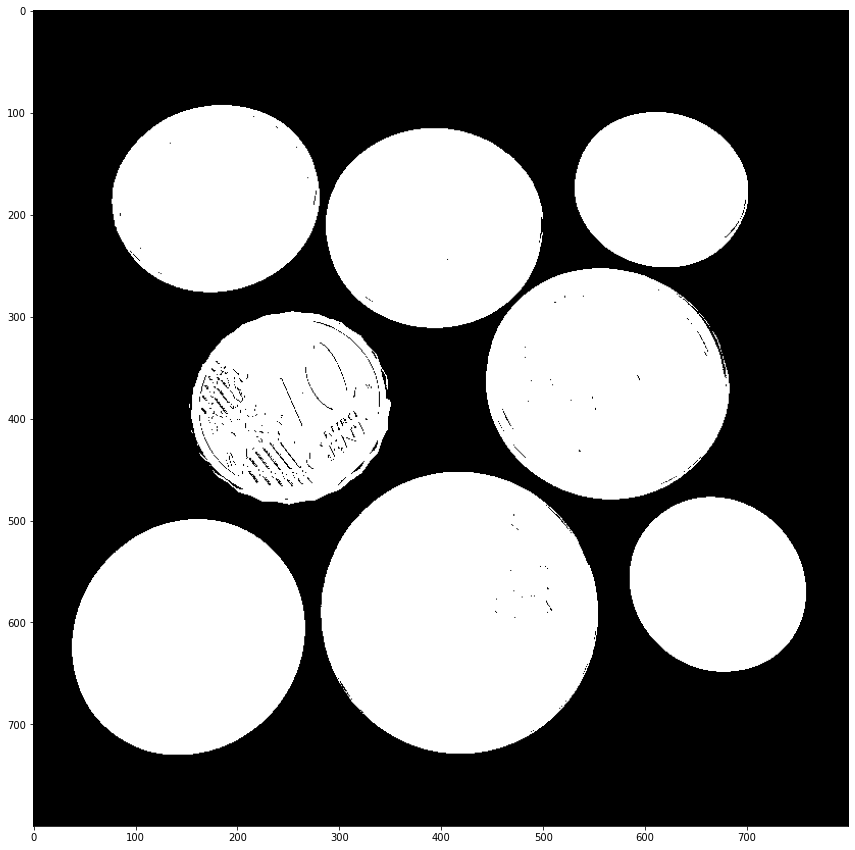

In [7]:
imshow(threshold)

In [8]:
# Find Contours
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

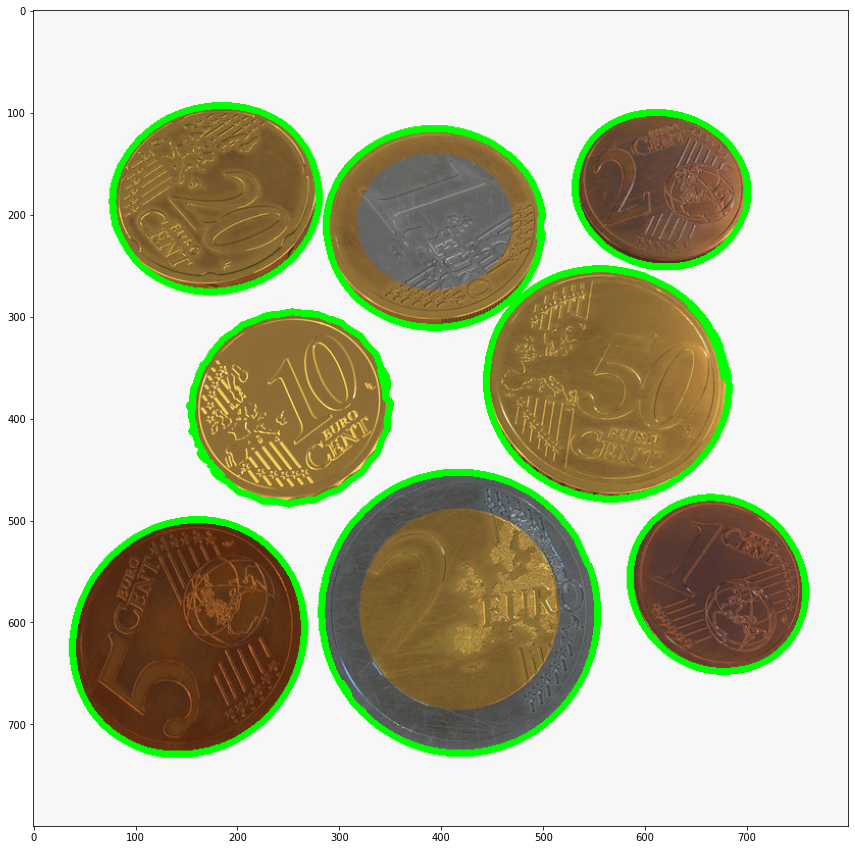

In [9]:
copy = coins.copy()
cv2.drawContours(copy, contours, -1, (0,255,0), thickness=5)
imshow(copy)

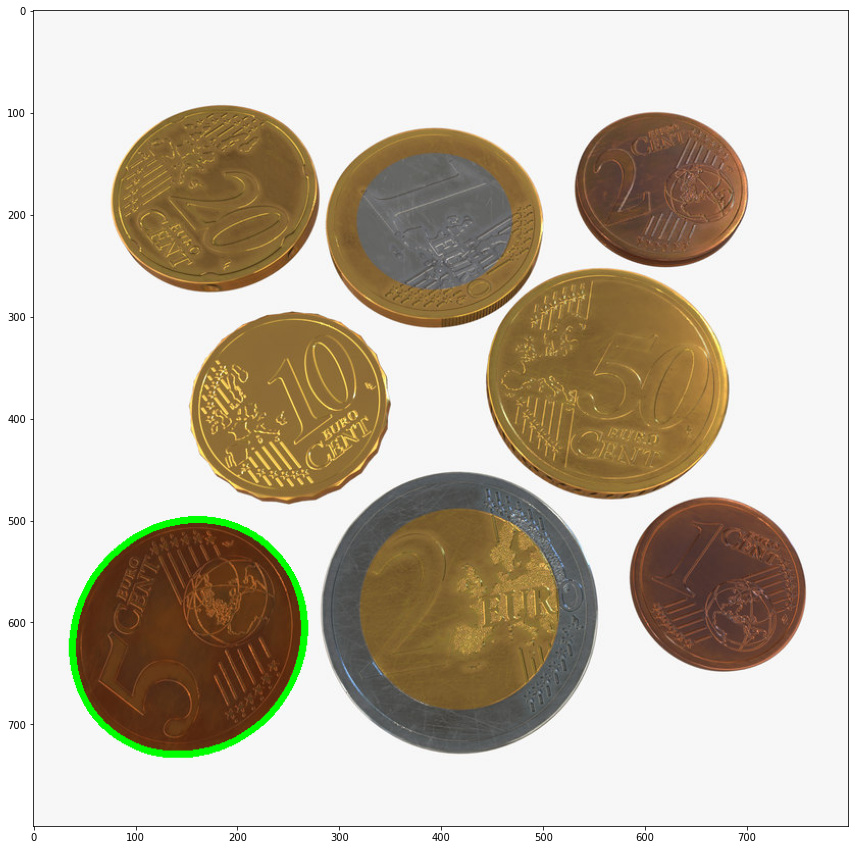

In [10]:
# Sort the contours
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
copy = coins.copy()
cv2.drawContours(copy, sorted_contours[2], -1, (0,255,0), thickness=5)
imshow(copy)

In [11]:
clean_contours = sorted_contours[0:9]

In [12]:
# Bounding Rectangle
x, y, w, h = cv2.boundingRect(clean_contours[0])

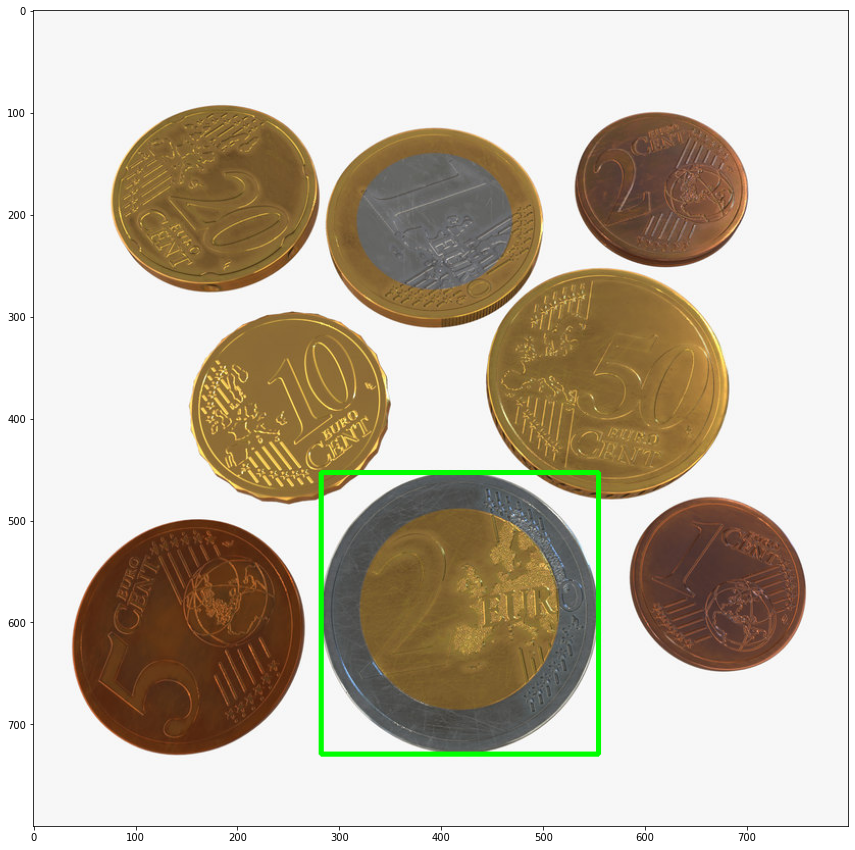

In [13]:
copy = coins.copy()
cv2.rectangle(copy, (x,y), (x+w, y+h), (0,255,0), 4)
imshow(copy)

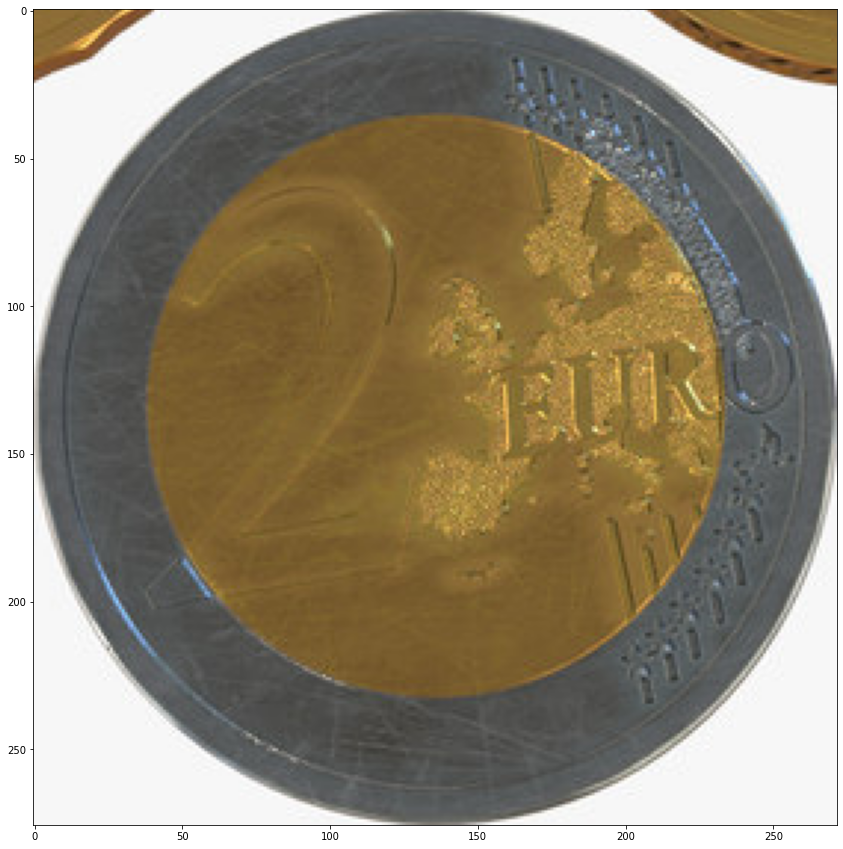

In [14]:
#cropping
two_euro_coins = coins[y:y+h,x:x+w]
imshow(two_euro_coins)

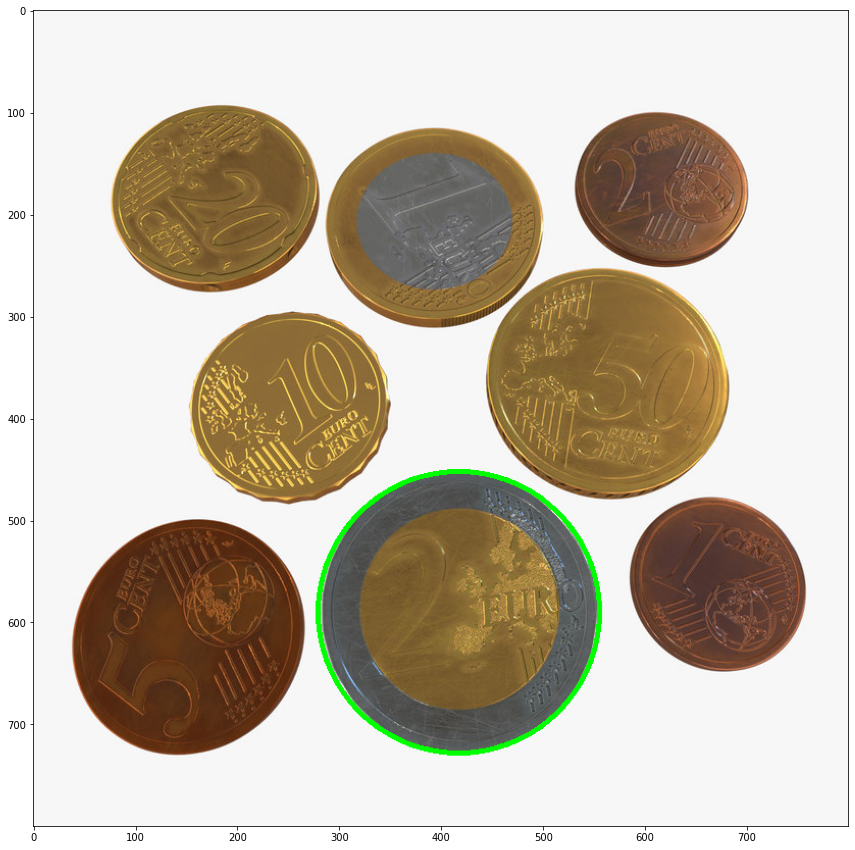

In [15]:
# For Circle
center, radius = cv2.minEnclosingCircle(clean_contours[0])
x = int(center[0])
y = int(center[1])
radius = int(radius)

copy = coins.copy()

cv2.circle(copy, (x,y), radius, (0,255,0), 4)
imshow(copy)

In [16]:
# Convex Hull
hand = cv2.imread('../img/hand.jpg')
hand_gray = cv2.cvtColor(hand, cv2.COLOR_BGR2GRAY)
ret, th = cv2.threshold(hand_gray, 220, 255, cv2.THRESH_BINARY_INV)

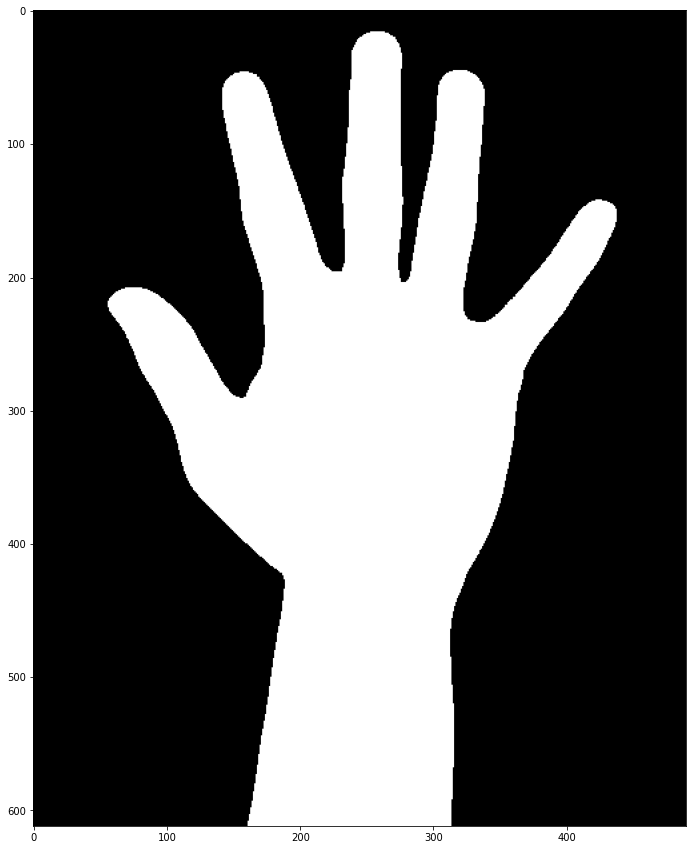

In [17]:
imshow(th)

In [18]:
# Find Contours
contours, h = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
len(contours)

1

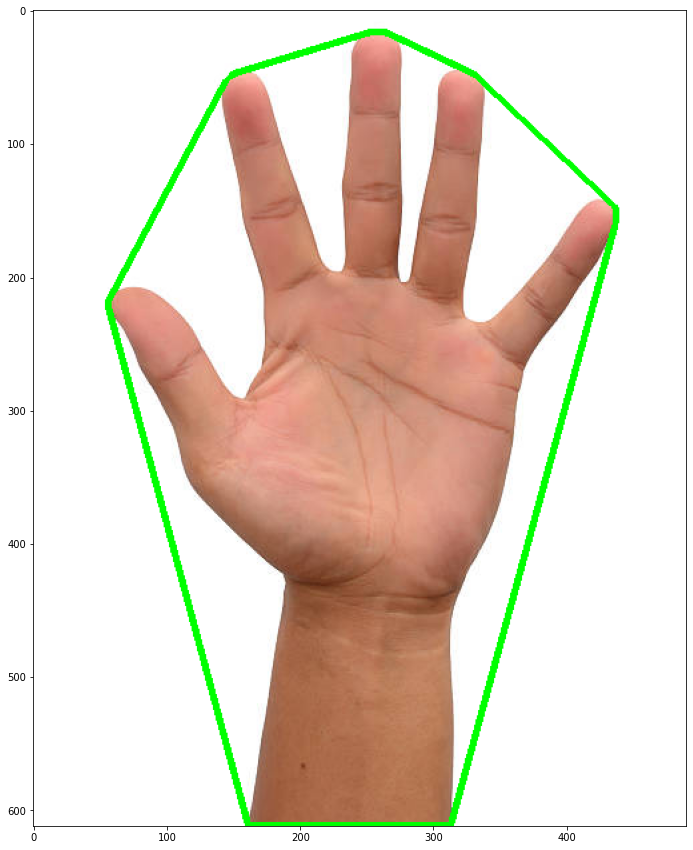

In [19]:
hull = cv2.convexHull(contours[0])
copy = hand.copy()
cv2.drawContours(copy, [hull], 0, (0,255,0), 4)
imshow(copy)

In [20]:
# Find Contours
car = cv2.imread('../img/car2.png')
car_gray = cv2.imread('../img/car2.png', 0)
ret, thresh = cv2.threshold(car_gray, 200, 255, cv2.THRESH_BINARY_INV)
contours, h = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

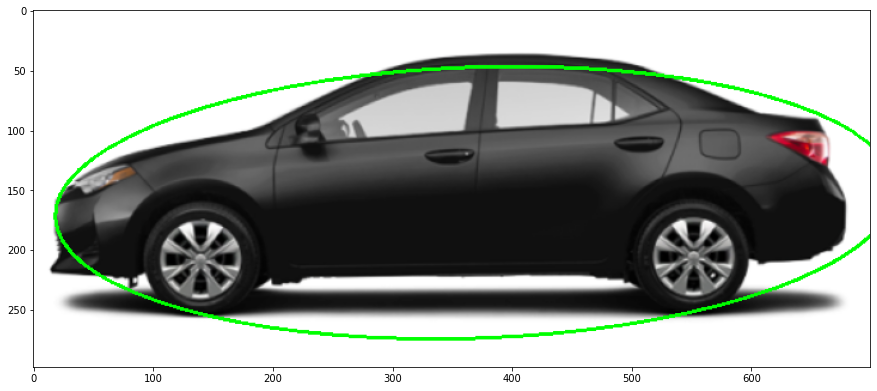

In [22]:
# For Ellipse
copy = car.copy()
ellipse = cv2.fitEllipse(contours[0])
cv2.ellipse(copy, ellipse, (0,255,0), 2)
imshow(copy)